# Trabajo en clase 08

# Jose Javier Fernández
## Operadores del Sistema de hormigas (SH)
- Realice las actividades que se le indican en los espacios disponibles. 
- Debe entregar una copia de este cuaderno en el espacio habilitado el tecDigital para el trabajo en clase 08.
- **Valor total 8 puntos**.
- Puede agregar celdas de texto o código si lo considera necesario.
- Use nombres descriptivos para las variables y las funciones que defina. 
- Agregue todos los comentarios que considere necesarios para mejorar la comprensión del código.

Los algoritmos de optimización por colonias de hormigas son muy adecuados para resolver problemas de rutas más cortas. La implementación que se le describirá funciona para resolver en problema del vendedor ambulante. El problema del vendedor ambulante es un problema típico de optimización que tiene muchas aplicaciones en distintas áreas, el problema se refiere a buscar la ruta más cortas entre un conjunto de ciudades.

Escriba un sistema de hormigas (SH) busque el camino más corto entre $N$ ciudades.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generación de las coordenadas de las ciudades

1. Almacene las coordenadas de _100_ ciudades en una lista. Las coordenas de la ciudad _i_ se obtienen como: **Valor: 1 punto.**
$$
x_i = 0.1\Big[(9 + 11i^2)~\text{mod}~200 \Big]\\
y_i = 0.1\Big[(7 + 1723i)~\text{mod}~200 \Big]
$$

In [2]:
# Lista de coordenadas
coordenadas = []
N = 100


for i in range(N):
    x = 0.1*(( 9 + 11 * i**2) % 200)
    y = 0.1*((7 + 1723 * i) % 200)
    coordenadas.append([x,y])

coordenadas = np.asarray(coordenadas)


2. Escriba una función que encuentre la distancia entre un par de ciudades. **Valor: 2 puntos.**
3. Calcule la distancia entre cada par de ciudades y almacene los valores obtenidos en una matriz. Cada fila y cada columna representa una ciudad, por lo tanto, la entrada (1,2) representa la distancia entre las ciudades _1_ y _2_. **Valor: 1 punto.**

In [3]:
# Distancia entre ciudades

def calcular_distancia(ciudad1, ciudad2):
    return np.sqrt( (ciudad2[0]-ciudad1[0])**2 + (ciudad2[1]-ciudad1[1])**2  )

In [4]:
distancias = np.zeros((N,N))

for i in range(N):
    for j in range(i,N):
        distancias[i,j] = calcular_distancia(coordenadas[i],coordenadas[j])
        distancias[j,i] = distancias[i,j]



### Inicialización de las feromonas

4. Cree una matriz $\tau_{ij}$ que almacene los valores de las feromonas. Esta matriz tiene la misma forma que la matriz de distancias entre ciudades, ya que cada conexión entre ciudades tiene su propio nivel de feromonas.
5. Genere la distancia _D_ del _tour de los vecinos más cercanos_. Es decir, seleccione una ciudad aleatoriamente y a partir de esa ciudad pase a la ciudad más cercana, luego a la más cercana, y así sucesivamente. El tour debe pasar por todas las ciudades. _D_ es la distancia total del tour. **Valor: 3 puntos.**
6. Defina los valores iniciales de feromonas como:
$$
\tau_{ij} = \tau_0 = \frac{N}{D}
$$
Donde _N_ es el número de ciudades. **Valor: 1 punto.**

In [5]:
# Inicialización de las feromonas

tau = np.zeros((N,N))

numCiudad = np.random.randint(0,N)
ciudadesVisitadas = [numCiudad]

D = 0


run = True
while run:
    ruta = distancias[numCiudad]
    indicesDistancias = []
    
    
    for i in range(N):
        if i not in ciudadesVisitadas:
            indicesDistancias.append([i,ruta[i]])
    

    indicesDistancias = np.asarray(indicesDistancias)

    indiceMinimo = np.argmin(indicesDistancias[:,1])
    numCiudad = int(indicesDistancias[indiceMinimo,0])

    D += indicesDistancias[indiceMinimo,1]


    ciudadesVisitadas.append(numCiudad)

    if len(ciudadesVisitadas)==N:
        run=False
        


tau[:]=D



#### Extra: Recorrido

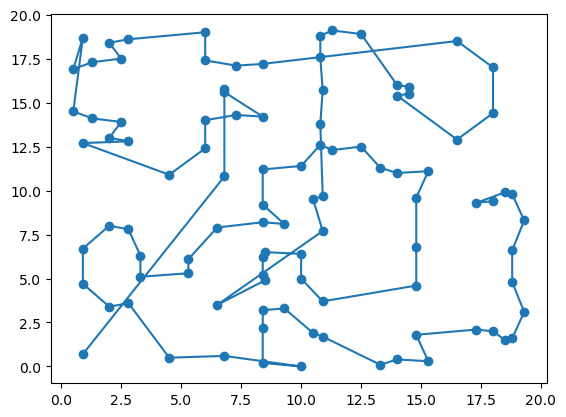

In [11]:
coordenadasEnRuta = []
for i in ciudadesVisitadas:
    coordenadasEnRuta.append(coordenadas[i]) 
coordenadasEnRuta = np.asarray(coordenadasEnRuta)



plt.scatter(coordenadas[:,0], coordenadas[:,1])
plt.plot(coordenadasEnRuta[:,0], coordenadasEnRuta[:,1])

plt.show()

## Referencias
* M.Wahde (2008). _Biologically Inspired Optimization Methods: An Introduction_. WIT Press.